<img src="https://3a2vzv37nkuw3esf6a3u2t7s-wpengine.netdna-ssl.com/webcentral/wp-content/uploads/sites/267/2019/02/horizontaldarkbackground.jpg" width="55%" align="left"> 
<br><br><br><br><br>
<font size=3 color='#08088A'>
<b>CSCI250 Python Computing: Building a Sensor System</b> <br><br>
Capstone final report
</font>
<hr style="height:5px" width="55%" align="left">

# Potato Controller

Insert one or more pictures of your project. 
You can do this by clicking **Edit** in the menu bar, then **Insert Image**.

# Group 

List all members and indicate specific project responsibilities:

* **Anthony Logan**  - Main coder.

    Created code that took inputs from joystick and applied them to keyeboard presses (WSAD). Created code that allows push buttons to have function in game. Assisted in hardware assembly. 


* **Frankie Austin** - Main Hardware

    Designed and 3D printed a case for the raspberry pi with cutouts for sensors. Assembled sensors and raspberry pi to form the final design.
    
    
*  **John Woolf** - Musician

    Created a program that can read notes and convert them to individual frequencies. Used 4 buzzers to play music such as the Wii themesong. 
    
    
* **Matthew Barbattini** - Secretary and Support

    Completed updates, assisted in code development, and wrote final report.

# Description

Our team has created a game controller akin to classic nintendo controllers. Our controller uses 2 joysticks and 4 push buttons that act as a D-Pad . A speaker is built into the controller using 4 buzzers that can play music similar to the game. The entire system sits inside a 3D printed case designed specifically for ergonomic function.

# Hardware

- 2x Joystick
- 4x Buzzers
- 4x Push Buttons
- 2x ADC


# Operation

The left joystick controls movement like using the WASD keys on a computer. Thr right joystick controls camera angle like using a mouse on a computer. The push buttons act as a D-Pad on a controller and have specific functions for the game being played.

# Data

As stated in the capstone guidelines notebook, your project must have 4 data components:

1. **Collect** data
2. **Process** data
3. **Display** data
4. **Interpret** data

Include a description of the data you collected, what processing you did, graphs/plots/visuals created by your code, and your interpretation/analysis of the data. 

There is no need to include raw data unless it helps your explanation.

* The joystick has two connections for vertical and horizontal position. These ouputs are sent through the ADC and give numbers between 0 and 1023. First, we tested what position on the joystick corresponded to some horizontal and vertical values, and then created a graph of this coordinate system. We converted these position outputs into polar coordinates, and interpreted the angles into ranges that correspond to the WASD keys. We made sure to include ranges where both keys are pressed at the same time, such as wanting to move northeast instead of just north. We wanted to have no movement when the joystick is idle, so we did not allow for the continuous reading to occur if the radius of our coordinate system was less than some minimum value.

# Wiring

* The controller's wiring is an amalgamation of each sensors respective ports. The buttons, joysticks and the buzzer are all connected with their own power source and ground. Both joysticks are also connected to a respective ADC since one joystick requires 2 channels in order to read every direction. Both ADC's are connected to the same breadboard, and each of the wires extend from the controller to the breadboard as well. In order to maximize wiring visibility and efficiency, two power and ground strips were made on each side of the board. This streamlined the way by which we wired the controller while also keeping the board neat for the video and the pictures. 

# Joysticks:  

* The general convention that we made in order to wire the joysticks is: "Green-Hortizontal, Yellow-Vertical". Each horizontal wire was connected to channel 0 of the ADC and each vertical wire was connected to channel 1 of the ADC. Since two ADC's were needed in order to read both inputs, one ADC was connected with CE0 and the other with CE1. 
* Each joystick had a different purpose. Our right joystick was designated to be in charge of all movement made by the player. Our left joystick was designated to the control the camera the player was using. 

# Push Buttons:

* Each button was connected to GPIO Pins 19-22. Each of them were grounded via a grounding strip on the breadboard. Each button had their own purpose as well. In the reference frame of the game 'Minecraft', our green button was our "strike" button, which was in charge of hitting blocks with whichever weapon was equipped. The blue button was our "set" button that would set blocks on the ground. Our yellow button is our "jump" button which made the avatar jumped when pressed. The red button was our "selector" button which was made to rotate through the player's inventory. Each button can be held in order to perform the action repeatedly. 
 
# Buzzers: 
* Our buzzer is connected to GPIO Pin 13 in order to access the optimal PWM for our action response system. Upon pressing a button, the buzzer will emit a note of a different frequency depending on the button that is pressed, which is akin to auditory feedback the player should get when playing a game and giving inputs to the avatar via their controller. 

# Code

Include all the code that makes your project run. It can be in a single code cell or split between many cells, whatever you prefer. Add documentation to explain what different portions of your code do.

In [92]:
import math
import adcUtil as adc
import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Matthew\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  if sys.path[0] == '':
C:\Users\Matthew\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if sys.path[0] == '':


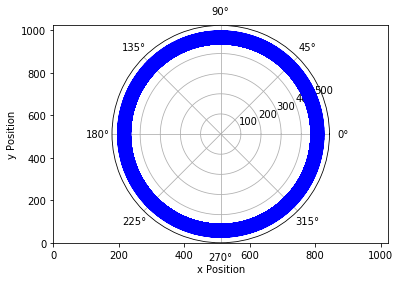

In [102]:
# Graph

xs = np.linspace(0, 1023, 1023)
ys = 511.5 * np.ones(1023, dtype=float)

graph, polar = plt.subplots()

plt.axis([0, 1023, 0, 1023])
plt.xlabel('x Position')
plt.ylabel('y Position')

plt.polar(511.5)
plt.plot(xs, ys, 'b')

In [32]:
# Joysticks + Push Buttons


In [ ]:
# Music player


# Credits

Include references to all code you used in your project. If it's a library, provide name, version and download link.